<a href="https://colab.research.google.com/github/Muluken1Walle/Logistic_Regression_Project/blob/main/Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import pandas as pd
Dataset=pd.read_csv('/content/drive/MyDrive/portu_banking_final.csv',)
Dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [232]:
Dataset.shape

(41188, 21)

There are total 21 Attributes present in the Dataset

In [233]:
Dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [234]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [235]:
Dataset['y'].unique()

array([0, 1])

In [236]:
Dataset['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

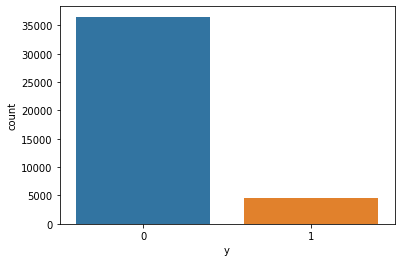

In [237]:
import seaborn as sns
sns.countplot(Dataset.y)

The ratio Between the catagories in the target varible 0 and 1 is 8:1 

0 means the diposit will not be purchased. 
1 means the diposit will be purchased.
The catagories the target variable inbalance.


In [238]:
#Part I : Get the dtypes of all the columns of our dataset
Dataset.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [239]:
#Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors
Dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [240]:
Dataset["age"] = Dataset["age"].replace({"35-30":"33", "30-35":"33", "25-30":"27",'18-25':"22", '30-32':"31",'50-55':"53",'45-50':"47",'20-25':"23",'20-40':"30",'35-40':"37",'30-40':"35"})

In [241]:
Dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '22', '70', '76', '73',
       '66', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95', 56, 39, 30, 53, 37, 22, 45, 31, 24, 50, 58, 33, 27, 28, 32,
       51, 41, 49, 43, 44, 35, 29, 26, 57, 25, 42, 48, 46, 67, 38, 34, 54,
       40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21, 88,
       18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81, 64,
       77, 74, 85, 82], dtype=object)

In [242]:
Dataset["age"] = Dataset["age"].astype(int)


In [243]:
Dataset["age"]

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [244]:
Dataset["marital"].unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [245]:
Dataset['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [246]:
#cols = obj_cols.columns
#for col in cols:
  #print(col,Dataset[col].unique())

In [247]:
Dataset['marital']= Dataset['marital'].replace({'married':'M','single':'S','divorced':'D','unknown':'M'})
Dataset['marital'].unique()


array(['M', 'S', 'D'], dtype=object)

In [248]:
Dataset['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [249]:
Dataset['job']=Dataset['job'].replace({'unknown':'admin','UNKNOWN':'admin.','ADMIN':'admin','SERVICES':'services','housemaid':'HOUSEMAID'})
Dataset['job']


0        blue-collar
1         technician
2         management
3           services
4            retired
            ...     
41183        retired
41184      HOUSEMAID
41185         admin.
41186     technician
41187        student
Name: job, Length: 41188, dtype: object

In [250]:
Dataset['marital'].value_counts()


M    25008
S    11568
D     4612
Name: marital, dtype: int64

In [251]:
Dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [252]:
Dataset['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [253]:
Dataset['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [254]:
Dataset['education']=Dataset['education'].replace({'basic.4y':'basic-4y','basic.9y':'basic-9y','basic.6y':'basic-6y','unknown':'university.degree'})
Dataset['education']

0                   basic-4y
1          university.degree
2          university.degree
3                high.school
4                   basic-4y
                ...         
41183            high.school
41184               basic-4y
41185      university.degree
41186    professional.course
41187            high.school
Name: education, Length: 41188, dtype: object

In [255]:

Dataset['education'].unique()

array(['basic-4y', 'university.degree', 'high.school', 'basic-9y',
       'professional.course', 'basic-6y', 'illiterate'], dtype=object)

In [256]:
Dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [257]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()


In [258]:
#Dataset1= le.fit_transform(Dataset.iloc[:,0])

In [259]:
#Dataset['job']= le.fit_transform(Dataset['job'])
#Dataset[ 'marital']= le.fit_transform(Dataset[ 'marital'])
#Dataset['education']= le.fit_transform(Dataset['education'])
#Dataset['default']= le.fit_transform(Dataset['default'])
#Dataset['housing']= le.fit_transform(Dataset['housing'])
#Dataset['contact']= le.fit_transform(Dataset['contact'])
#Dataset['month']= le.fit_transform(Dataset['month'])
#Dataset['day_of_week']= le.fit_transform(Dataset['day_of_week'])
#Dataset['poutcome']= le.fit_transform(Dataset['poutcome'])
#Dataset['loan']=le.fit_transform(Dataset['loan'])

In [260]:
Dataset['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [261]:
Dataset['default']  = Dataset['default'].replace({'unknown':'no'})
Dataset['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [262]:
obj_cols = Dataset.select_dtypes(include='object')
obj_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,M,basic-4y,no,yes,no,cellular,aug,thu,nonexistent
1,technician,M,university.degree,no,no,no,cellular,nov,fri,nonexistent
2,management,S,university.degree,no,yes,no,cellular,jun,thu,success
3,services,M,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,M,basic-4y,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41183,retired,M,high.school,no,no,yes,telephone,jun,thu,nonexistent
41184,HOUSEMAID,M,basic-4y,no,no,no,telephone,may,thu,nonexistent
41185,admin.,S,university.degree,no,yes,yes,telephone,may,wed,nonexistent
41186,technician,M,professional.course,no,no,yes,telephone,oct,tue,nonexistent


In [263]:
cols = obj_cols.columns
for col in cols:
  print(col,Dataset[col].unique())

job ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'HOUSEMAID' 'unemployed' 'entrepreneur' 'self-employed' 'admin' 'student'
 'MANAGEMENT' 'RETIRED' 'STUDENT' 'ADMIN.' 'TECHNICIAN' 'BLUE-COLLAR']
marital ['M' 'S' 'D']
education ['basic-4y' 'university.degree' 'high.school' 'basic-9y'
 'professional.course' 'basic-6y' 'illiterate']
default ['no' 'yes']
housing ['yes' 'no' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['cellular' 'telephone']
month ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
day_of_week ['thu' 'fri' 'tue' 'mon' 'wed']
poutcome ['nonexistent' 'success' 'failure']


In [264]:
Dataset.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [265]:
Dataset.groupby(['y']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910748,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [266]:
Dataset.groupby(['job']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
ADMIN.,35.000000,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,47.000000,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
MANAGEMENT,36.000000,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,69.666667,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
STUDENT,24.500000,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,37.000000,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
admin,45.544073,240.240122,2.644377,938.544073,0.155015,0.355623,93.718106,-38.805167,3.946252,5172.876900,0.112462
admin.,38.188945,254.219461,2.623836,956.042222,0.189041,0.015459,93.534010,-40.245802,3.550149,5164.122771,0.129738


In [267]:

Dataset.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
D,44.899176,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
M,42.300344,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
S,33.158109,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


In [268]:
Dataset.groupby(['education']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic-4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic-6y,40.447208,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic-9y,39.062035,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079916,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,39.451184,254.365062,2.567595,951.984747,0.196633,-0.017231,93.514034,-39.963602,3.534824,5162.768386,0.138211


In [269]:
Dataset['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'HOUSEMAID', 'unemployed', 'entrepreneur',
       'self-employed', 'admin', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR'], dtype=object)

In [270]:
Dataset['job'].replace({'ADMIN.':'ADMIN','admin.':'ADMIN','blue-collar':'BLUE-COLLAR','technician':'TECHNICIAN','management':'MANAGEMENT','retired':'RETIRED','admin':'ADMIN','student':'STUDENT'},inplace=True)

In [271]:
Dataset['job'].unique()

array(['BLUE-COLLAR', 'TECHNICIAN', 'MANAGEMENT', 'services', 'RETIRED',
       'ADMIN', 'HOUSEMAID', 'unemployed', 'entrepreneur',
       'self-employed', 'STUDENT'], dtype=object)

In [272]:
Dataset['job'].value_counts

<bound method IndexOpsMixin.value_counts of 0        BLUE-COLLAR
1         TECHNICIAN
2         MANAGEMENT
3           services
4            RETIRED
            ...     
41183        RETIRED
41184      HOUSEMAID
41185          ADMIN
41186     TECHNICIAN
41187        STUDENT
Name: job, Length: 41188, dtype: object>

In [273]:
Dataset['marital'].unique()

array(['M', 'S', 'D'], dtype=object)

In [274]:
Dataset['marital'].value_counts

<bound method IndexOpsMixin.value_counts of 0        M
1        M
2        S
3        M
4        M
        ..
41183    M
41184    M
41185    S
41186    M
41187    S
Name: marital, Length: 41188, dtype: object>

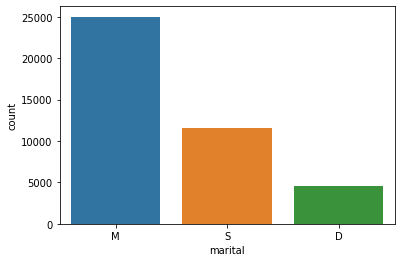

In [275]:
import seaborn as sns
sns.countplot(Dataset['marital'])



In [276]:
Dataset['age'].unique()

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       22, 70, 76, 73, 66, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

(array([1.6660e+03, 1.1344e+04, 1.2036e+04, 8.0880e+03, 5.8220e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

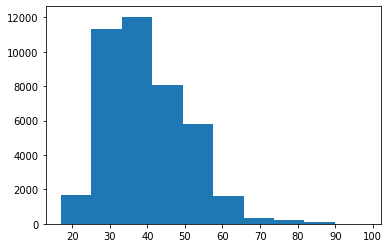

In [277]:
import matplotlib.pyplot as plt

plt.hist(Dataset.age)

In [278]:
Dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [279]:
Dataset_cat= Dataset.select_dtypes(include='object')
Dataset_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,BLUE-COLLAR,M,basic-4y,no,yes,no,cellular,aug,thu,nonexistent
1,TECHNICIAN,M,university.degree,no,no,no,cellular,nov,fri,nonexistent
2,MANAGEMENT,S,university.degree,no,yes,no,cellular,jun,thu,success
3,services,M,high.school,no,no,no,cellular,apr,fri,nonexistent
4,RETIRED,M,basic-4y,no,yes,no,cellular,aug,fri,success


In [280]:
Dataset_cat.drop(['month','day_of_week'],axis=1,inplace=True)

In [281]:
Dataset_c= Dataset

In [282]:
cols=Dataset_cat.columns

In [283]:
for i in cols:
  dummies=pd.get_dummies(Dataset[i],drop_first=True)
  Dataset_c=pd.concat([Dataset_c,dummies],axis='columns')


In [284]:
Dataset_c

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,professional.course,university.degree,yes,unknown,yes,unknown,yes,telephone,nonexistent,success
0,44,BLUE-COLLAR,M,basic-4y,no,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,TECHNICIAN,M,university.degree,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
2,28,MANAGEMENT,S,university.degree,no,yes,no,cellular,jun,thu,...,0,1,0,0,1,0,0,0,0,1
3,39,services,M,high.school,no,no,no,cellular,apr,fri,...,0,0,0,0,0,0,0,0,1,0
4,55,RETIRED,M,basic-4y,no,yes,no,cellular,aug,fri,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,RETIRED,M,high.school,no,no,yes,telephone,jun,thu,...,0,0,0,0,0,0,1,1,1,0
41184,31,HOUSEMAID,M,basic-4y,no,no,no,telephone,may,thu,...,0,0,0,0,0,0,0,1,1,0
41185,42,ADMIN,S,university.degree,no,yes,yes,telephone,may,wed,...,0,1,0,0,1,0,1,1,1,0
41186,48,TECHNICIAN,M,professional.course,no,no,yes,telephone,oct,tue,...,1,0,0,0,0,0,1,1,1,0


In [285]:
Dataset_c.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],axis=1,inplace=True)
Dataset_c.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,professional.course,university.degree,yes,unknown,yes,unknown,yes,telephone,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,1,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,1,0,0,0,0,1


In [286]:
Dataset_c.isna().sum()

age                    0
duration               0
campaign               0
pdays                  0
previous               0
emp_var_rate           0
cons_price_idx         0
cons_conf_idx          0
euribor3m              0
nr_employed            0
y                      0
BLUE-COLLAR            0
HOUSEMAID              0
MANAGEMENT             0
RETIRED                0
STUDENT                0
TECHNICIAN             0
entrepreneur           0
self-employed          0
services               0
unemployed             0
M                      0
S                      0
basic-6y               0
basic-9y               0
high.school            0
illiterate             0
professional.course    0
university.degree      0
yes                    0
unknown                0
yes                    0
unknown                0
yes                    0
telephone              0
nonexistent            0
success                0
dtype: int64

In [287]:
Dataset_c.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'BLUE-COLLAR', 'HOUSEMAID', 'MANAGEMENT', 'RETIRED', 'STUDENT',
       'TECHNICIAN', 'entrepreneur', 'self-employed', 'services', 'unemployed',
       'M', 'S', 'basic-6y', 'basic-9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'yes', 'unknown', 'yes',
       'unknown', 'yes', 'telephone', 'nonexistent', 'success'],
      dtype='object')

In [288]:
Dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=Dataset_c.drop(['y'],axis=1)
X


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,professional.course,university.degree,yes,unknown,yes,unknown,yes,telephone,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,1,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,0,0,1,1,1,0
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,0,0,0,1,1,0
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,0,1,1,1,0
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,0,1,1,1,0


In [290]:
Y=Dataset_c['y']
Y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [291]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [292]:
y_train

8889     1
9948     0
26260    0
19298    0
13710    0
        ..
31831    0
19627    1
29621    0
4037     0
23376    1
Name: y, Length: 32950, dtype: int64

In [293]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [294]:
from sklearn.metrics import classification_report
predictions= model.predict(x_test)
print(predictions)
print()
print(classification_report(y_test,predictions))

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7271
           1       0.68      0.40      0.51       967

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



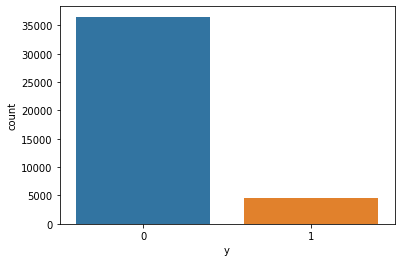

In [295]:
import seaborn as sns
sns.countplot(Dataset.y)

In [296]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[7088,  183],
       [ 578,  389]])

In [297]:
print('Before Oversampling count of label 1 ',sum(y_train==1))
print('Before Oversampling count of label 0 ',sum(y_train==0))

Before Oversampling count of label 1  3673
Before Oversampling count of label 0  29277


In [298]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(x_train.values,y_train.ravel())



In [299]:
print('After Oversampling count of label 1 ',sum(y_train_sm==1))
print('After Oversampling count of label 0 ',sum(y_train_sm==0))

After Oversampling count of label 1  29277
After Oversampling count of label 0  29277


In [300]:
x_train,x_test,y_train,y_test=train_test_split(X_train_sm,y_train_sm,test_size=0.2)

In [301]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [302]:
from sklearn.metrics import classification_report
predictions= model.predict(x_test)
print(predictions)
print()
print(classification_report(y_test,predictions))

[0 1 1 ... 1 0 1]

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5866
           1       0.85      0.85      0.85      5845

    accuracy                           0.85     11711
   macro avg       0.85      0.85      0.85     11711
weighted avg       0.85      0.85      0.85     11711



In [303]:
confusion_matrix(y_test,predictions)

array([[4986,  880],
       [ 859, 4986]])

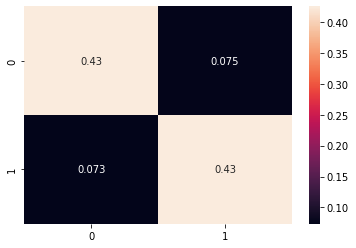

In [304]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions,normalize='all'),annot=True)

In [305]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
rfe = RFE(model,n_features_to_select=None)
rfe = rfe.fit(x_train,y_train)

print(rfe.support_)


[False False  True False  True  True  True  True  True False  True False
 False  True  True False False False  True False  True  True  True  True
 False False False  True False False False False False  True  True  True]


In [306]:
print(rfe.ranking_)

[14  2  1 16  1  1  1  1  1  4  1 17 11  1  1 12  7 10  1  6  1  1  1  1
  5 18  9  1 19 13  3 15  8  1  1  1]
